In [1]:
import os

import cv2

import numpy as np

from matplotlib import pyplot as plt

In [2]:
def read_image(image_path, plot=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if plot:
        plt.imshow(img)
        plt.show()
    return img

def show_compare(images: list, image_names: list = []):
    count = len(images)
    count_names = len(image_names)
    fig, axes = plt.subplots(1, count)
    for cnt in range(count):
        axes[cnt].imshow(images[cnt])
        axes[cnt].axis('off')
        if cnt < count_names:
            axes[cnt].set_title(image_names[cnt])
    plt.show()

In [3]:
def scale(image):
    minimum = np.min(image)
    filtered = (255*(image - minimum)/np.ptp(image)).astype(np.uint8)
    return filtered

    
def clip(image):
    filtered = np.clip(image, 0, 255).astype(np.uint8)
    return filtered

def final_remake_to_image(image, kernel):
    sharpen = np.array([
        [0, -1, 0,],
        [-1, 5, -1,],
        [0, -1, 0,],
    ])
    if np.sum(kernel) == 0 or (kernel.shape == sharpen.shape and np.all(kernel  == sharpen)):
        print("Cliping array...")
        filtered = clip(image)
    else:
        print("Scaling array...")
        filtered = scale(image)
    return filtered


def apply_kernel_filter(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    kh, kw = kernel.shape
    H, W, C = image.shape

    pad_h = kernel.shape[0]//2
    pad_v = kernel.shape[1]//2

    image_with_kernel = image.copy()
    image_padded = np.pad(image, ((pad_h, pad_h), (pad_v, pad_v), (0, 0)), mode='edge')

    image_with_kernel = np.zeros_like(image, dtype=np.float32)

    for ch in range(C):
        windows = np.zeros((H, W, kh, kw), dtype=np.float32)
        for i in range(kh):
            for j in range(kw):
                windows[:, :, i, j] = image_padded[i:i+H, j:j+W, ch]

        image_with_kernel[..., ch] = np.sum(windows * kernel, axis=(2, 3))

    return final_remake_to_image(image_with_kernel, kernel)


def USP(image: np.ndarray, amount: int = 1) -> np.ndarray:
    image_float = image.astype(float)

    # Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
    # gaussian = np.array([
    #     [0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,],
    #     [0.0000,	0.0000,	0.0000,	0.0000,	0.0001,	0.0001,	0.0001,	0.0000,	0.0000,	0.0000,	0.0000],
    #     [0.0000,	0.0000,	0.0000,	0.0004,	0.0014,	0.0023,	0.0014,	0.0004,	0.0000,	0.0000,	0.0000,],
    #     [0.0000,	0.0000,	0.0004,	0.0037,	0.0146,	0.0232,	0.0146,	0.0037,	0.0004,	0.0000,	0.0000,],
    #     [0.0000,	0.0001,	0.0014,	0.0146,	0.0584,	0.0926,	0.0584,	0.0146,	0.0014,	0.0001,	0.0000,],
    #     [0.0000,	0.0001,	0.0023,	0.0232,	0.0926,	0.1466,	0.0926,	0.0232,	0.0023,	0.0001,	0.0000,],
    #     [0.0000,	0.0001,	0.0014,	0.0146,	0.0584,	0.0926,	0.0584,	0.0146,	0.0014,	0.0001,	0.0000,],
    #     [0.0000,	0.0000,	0.0004,	0.0037,	0.0146,	0.0232,	0.0146,	0.0037,	0.0004,	0.0000,	0.0000,],
    #     [0.0000,	0.0000,	0.0000,	0.0004,	0.0014,	0.0023,	0.0014,	0.0004,	0.0000,	0.0000,	0.0000,],
    #     [0.0000,	0.0000,	0.0000,	0.0000,	0.0001,	0.0001,	0.0001,	0.0000,	0.0000,	0.0000,	0.0000,],
    #     [0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,	0.0000,],
    # ], dtype=np.float32)
    gaussian = 1/16 * np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ], dtype=float)
    unsharp = apply_kernel_filter(image_float, gaussian)

    # Create the difference image (original − unsharp)
    # Note: Remember that you are working with uint8 data types. Any addition or substractions
    # might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
    diff = image_float - unsharp

    # Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
    # Note: Again, take care of underflows/overflows if necessary.
    sharpened = image_float + diff * amount
    sharpened = scale(sharpened)

    show_compare([image_float.astype(int), unsharp, scale(diff), sharpened], ["Original", "Unsharp", "Diff", "Sharpened"])

    return sharpened

In [4]:
image_paths = ["../data/" + path for path in os.listdir("../data")]
plt.rcParams['figure.figsize'] = [15, 10]

../data/1344829.png
[!] Amount is 1
Scaling array...


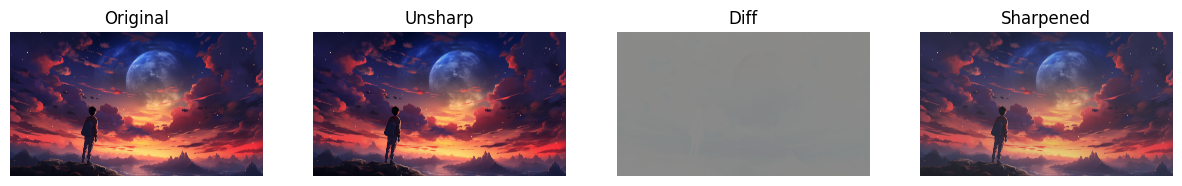

[!] Amount is .5
Scaling array...


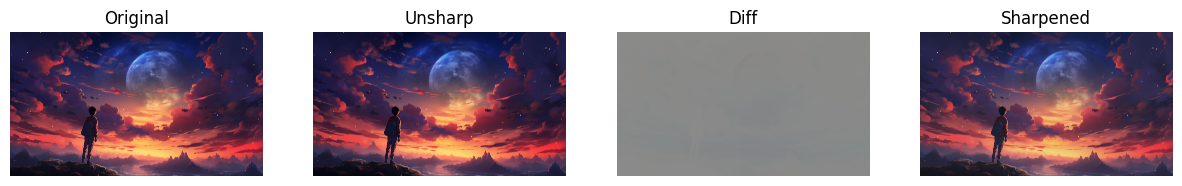

[!] Amount is .1
Scaling array...


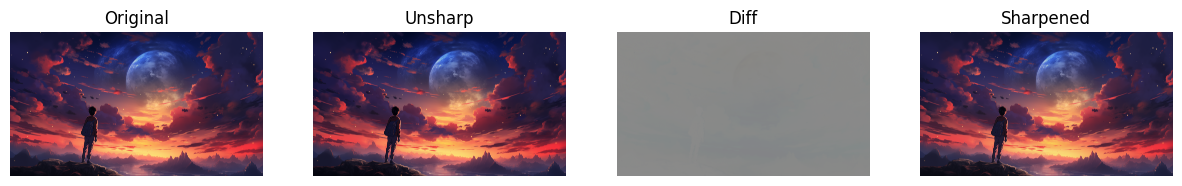

[!] Amount is .01
Scaling array...


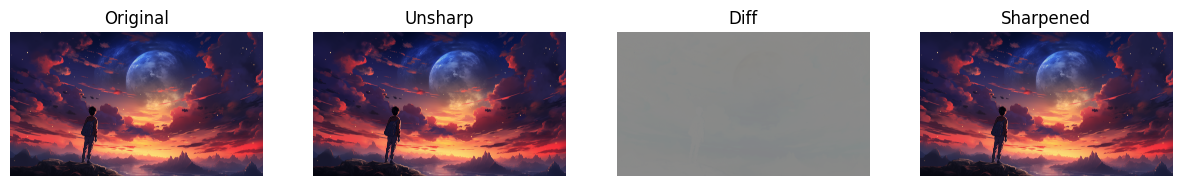

../data/1350497.png
[!] Amount is 1
Scaling array...


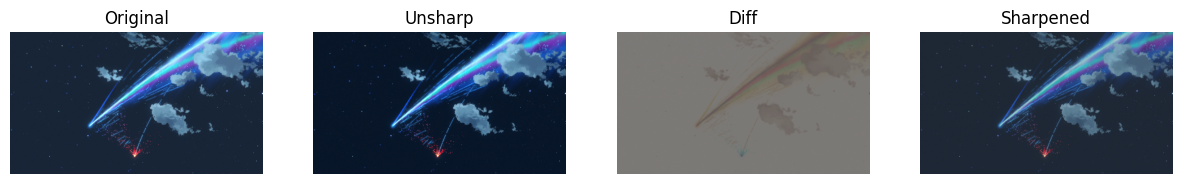

[!] Amount is .5
Scaling array...


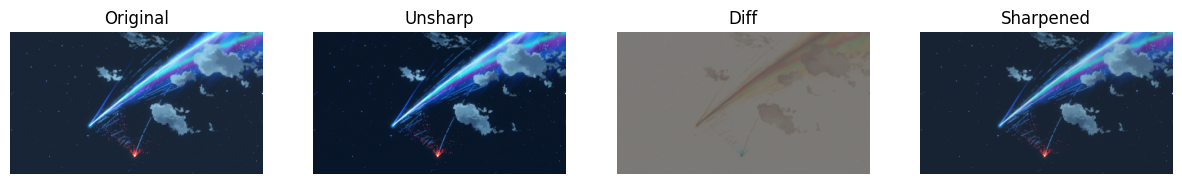

[!] Amount is .1
Scaling array...


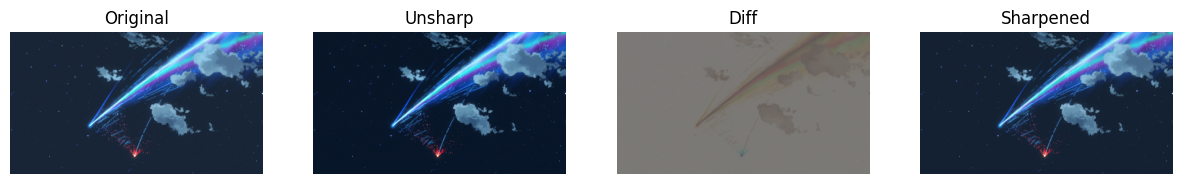

[!] Amount is .01
Scaling array...


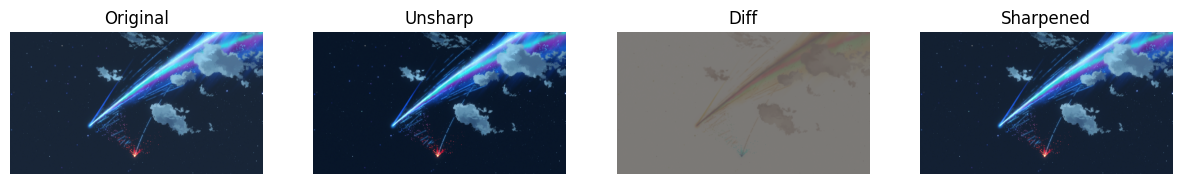

../data/dark.png
[!] Amount is 1
Scaling array...


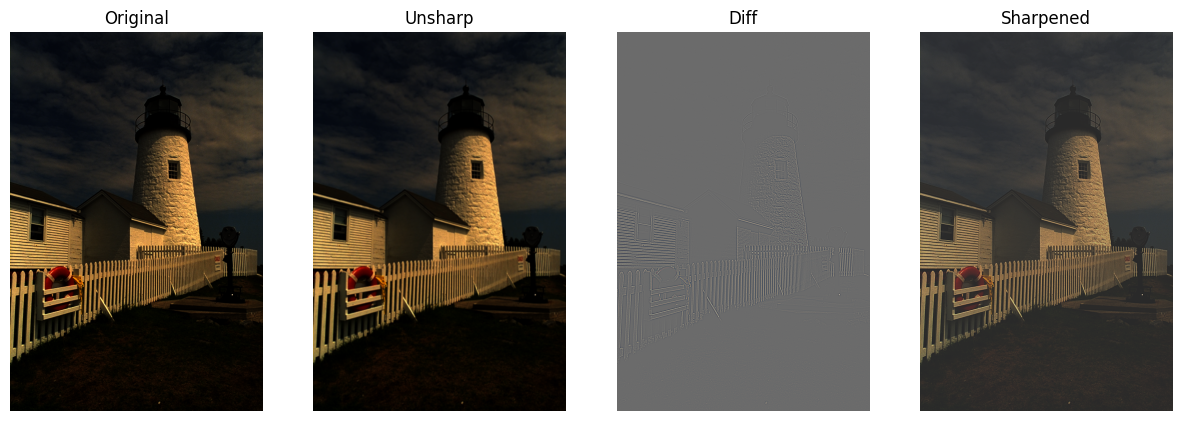

[!] Amount is .5
Scaling array...


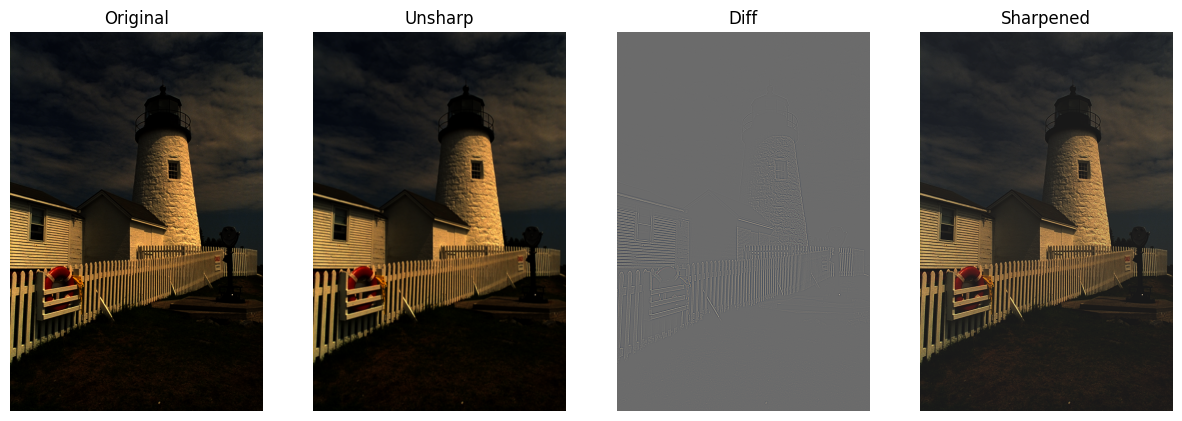

[!] Amount is .1
Scaling array...


[!] Amount is .01
Scaling array...


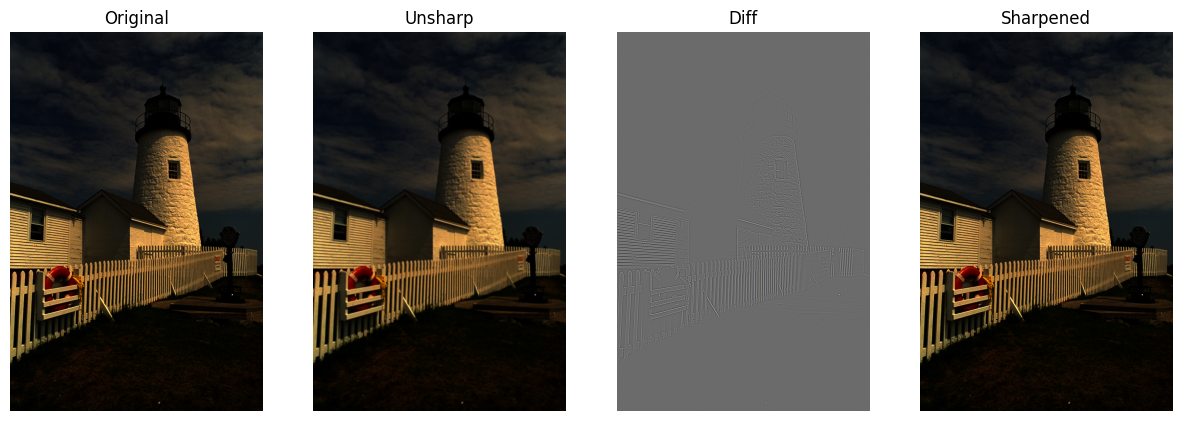

../data/kodim01.png
[!] Amount is 1
Scaling array...


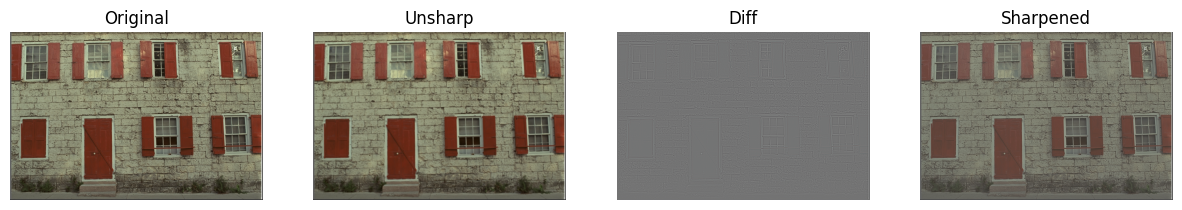

[!] Amount is .5
Scaling array...


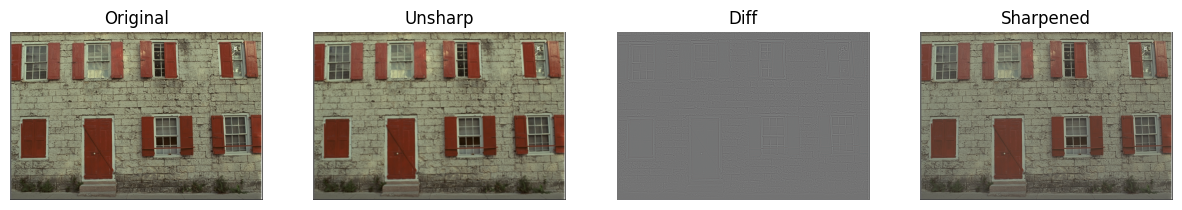

[!] Amount is .1
Scaling array...


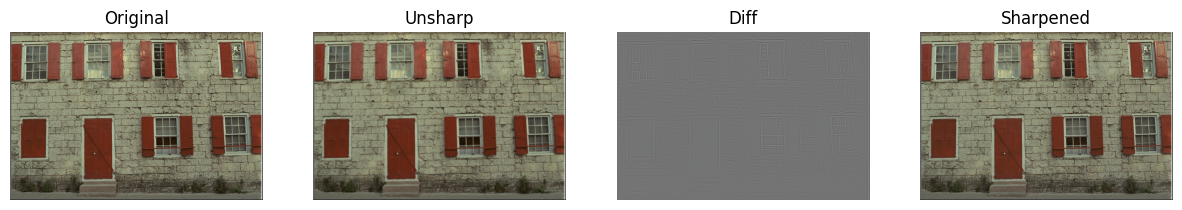

[!] Amount is .01
Scaling array...


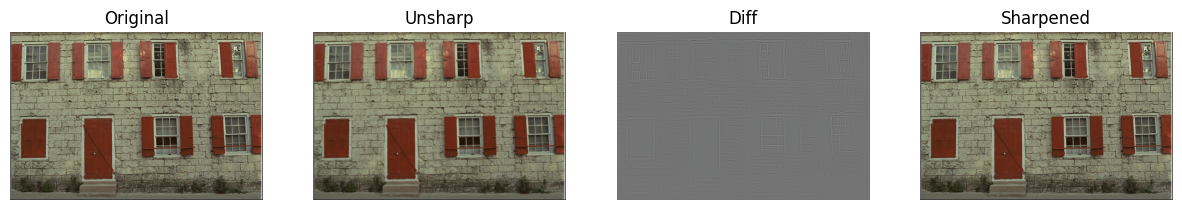

../data/kodim05.jpg
[!] Amount is 1
Scaling array...


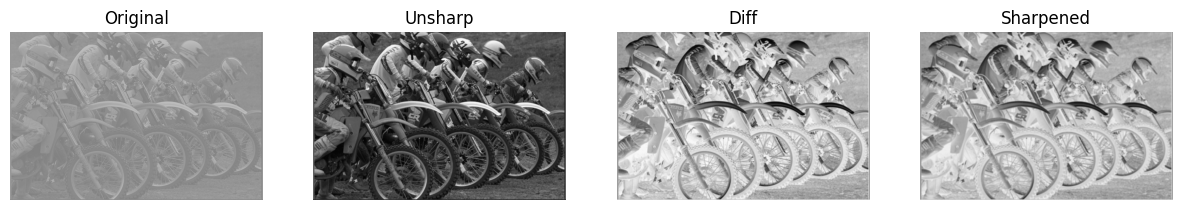

[!] Amount is .5
Scaling array...


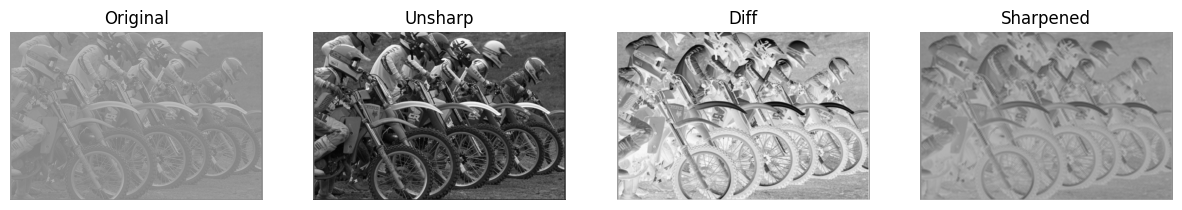

[!] Amount is .1
Scaling array...


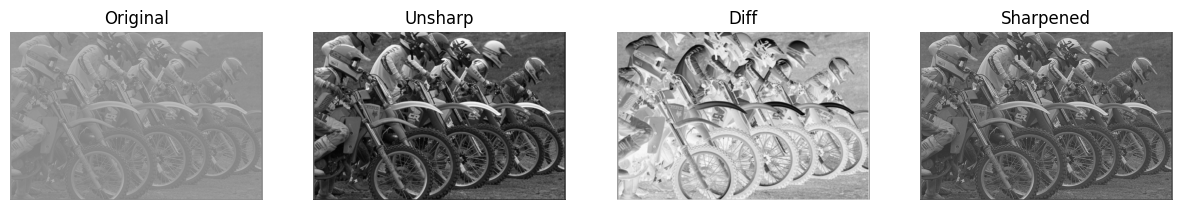

[!] Amount is .01
Scaling array...


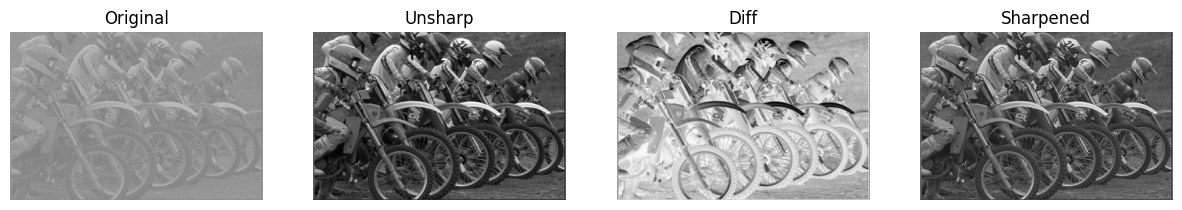

../data/kodim07.png
[!] Amount is 1
Scaling array...


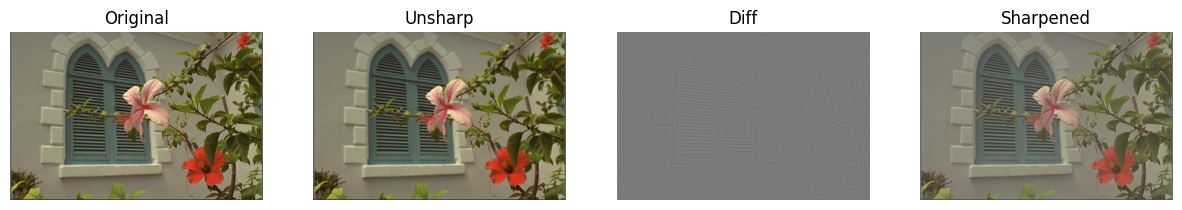

[!] Amount is .5
Scaling array...


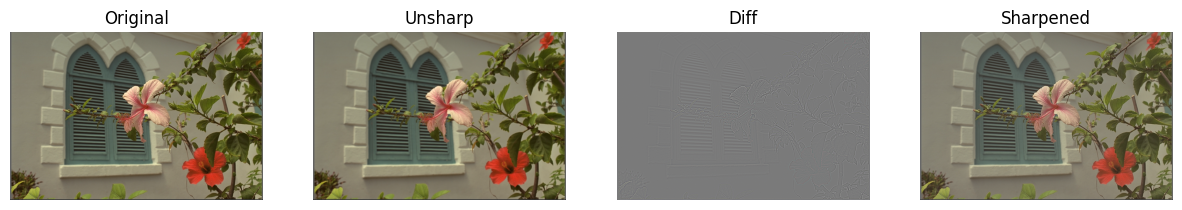

[!] Amount is .1
Scaling array...


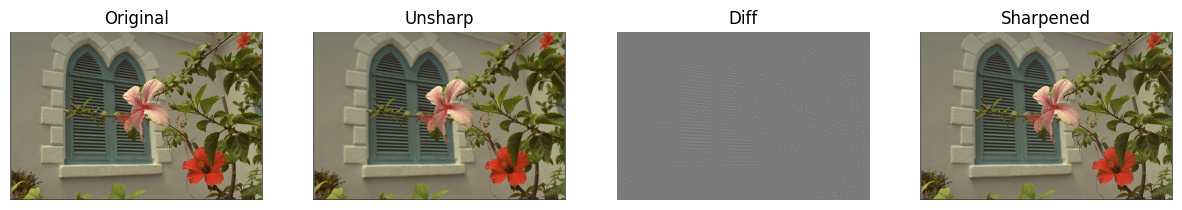

[!] Amount is .01
Scaling array...


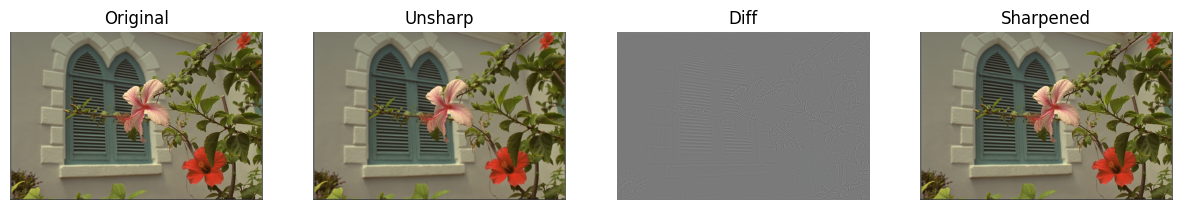

../data/tire.png
[!] Amount is 1
Scaling array...


[!] Amount is .5
Scaling array...


[!] Amount is .1
Scaling array...


[!] Amount is .01
Scaling array...


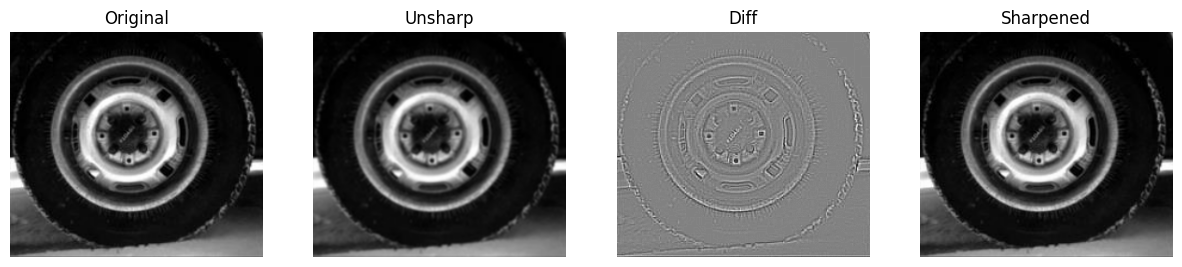

In [5]:
visible_diff = ["../data/1344829.png", "../data/1350497.png", "../data/dark.png", "../data/kodim01.png", "../data/kodim05.jpg", "../data/kodim07.png", "../data/tire.png"]
# for image_path in image_paths:
for image_path in visible_diff:
    print(image_path)
    image = read_image(image_path)
    print("[!] Amount is 1")
    USP(image, 1)
    print("[!] Amount is .5")
    USP(image, .5)
    print("[!] Amount is .1")
    USP(image, .1)
    print("[!] Amount is .01")
    USP(image, .01)